In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/chipo.tsv',sep='\t')

In [ ]:
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
df.tail()

,order_id,quantity,item_name,choice_description,item_price
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [ ]:
print("nbr d'observation",df.shape[0])
print("nbr de variable",df.shape[1])

nbr d'observation 4622
nbr de variable 5


In [ ]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=4622, step=1)

In [ ]:
df.count()

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [ ]:
c=df.groupby("item_name").sum()
c=c.sort_values(['quantity'],ascending=False)

<ipython-input-12-8c5ca9bb5744>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  c=df.groupby("item_name").sum()


In [ ]:
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [ ]:
c.head()

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


In [ ]:
c=c[['quantity']]
c.head()

,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


In [ ]:
df.item_price.dtype

dtype('O')

In [ ]:
dollarizer=lambda x: float(x[1:-1])
df.item_price=df.item_price.apply(dollarizer)

In [ ]:
df.item_price.dtype

dtype('float64')

In [ ]:
df_filtered=df.drop_duplicates(['item_name','quantity','choice_description'])

In [ ]:
print("nbr d'observation apres le filtrage",df_filtered.shape[0])

nbr d'observation apres le filtrage 1949


In [ ]:
df_filtered[df_filtered['item_price']>10].item_name.nunique()

31

In [ ]:
x=df.item_name

In [ ]:
letter_counts=Counter(x)
letter_counts

Counter({'Chips and Fresh Tomato Salsa': 110,
         'Izze': 20,
         'Nantucket Nectar': 27,
         'Chips and Tomatillo-Green Chili Salsa': 31,
         'Chicken Bowl': 726,
         'Side of Chips': 101,
         'Steak Burrito': 368,
         'Steak Soft Tacos': 55,
         'Chips and Guacamole': 479,
         'Chicken Crispy Tacos': 47,
         'Chicken Soft Tacos': 115,
         'Chicken Burrito': 553,
         'Canned Soda': 104,
         'Barbacoa Burrito': 91,
         'Carnitas Burrito': 59,
         'Carnitas Bowl': 68,
         'Bottled Water': 162,
         'Chips and Tomatillo Green Chili Salsa': 43,
         'Barbacoa Bowl': 66,
         'Chips': 211,
         'Chicken Salad Bowl': 110,
         'Steak Bowl': 211,
         'Barbacoa Soft Tacos': 25,
         'Veggie Burrito': 95,
         'Veggie Bowl': 85,
         'Steak Crispy Tacos': 35,
         'Chips and Tomatillo Red Chili Salsa': 48,
         'Barbacoa Crispy Tacos': 11,
         'Veggie Salad Bowl': 1

In [ ]:
df1=pd.DataFrame.from_dict(letter_counts,orient='index')
df1

,0
Chips and Fresh Tomato Salsa,110
Izze,20
Nantucket Nectar,27
Chips and Tomatillo-Green Chili Salsa,31
Chicken Bowl,726
Side of Chips,101
Steak Burrito,368
Steak Soft Tacos,55
Chips and Guacamole,479
Chicken Crispy Tacos,47


In [ ]:
df1=df1[0].sort_values(ascending=True)[45:50:]

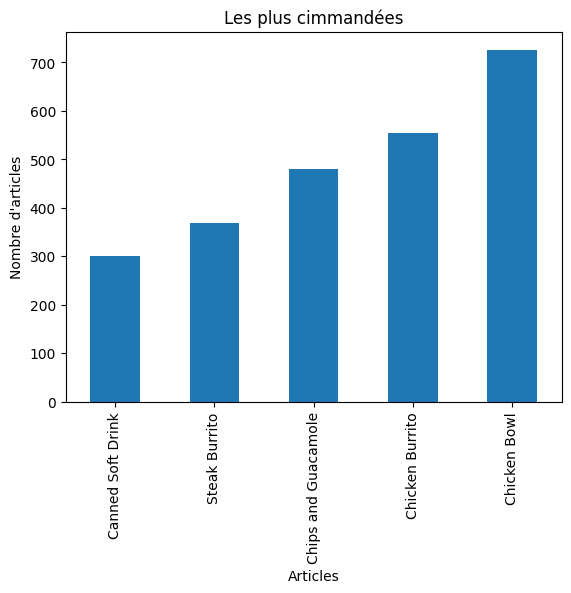

In [ ]:
df1.plot(kind='bar')
plt.xlabel('Articles')
plt.ylabel('Nombre d\'articles')
plt.title('Les plus cimmandées')
plt.show()

In [ ]:
cars1=pd.read_csv("cars1.csv")
cars2=pd.read_csv("cars2.csv")

In [ ]:
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [ ]:
cars2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,33.0,4,91,53,1795,17.4,76,3,honda civic
1,20.0,6,225,100,3651,17.7,76,1,dodge aspen se
2,18.0,6,250,78,3574,21.0,76,1,ford granada ghia
3,18.5,6,250,110,3645,16.2,76,1,pontiac ventura sj
4,17.5,6,258,95,3193,17.8,76,1,amc pacer d/l


In [ ]:
print("nbr d'observation de cars 1 ",cars1.shape[0], "et de variable ",cars1.shape[1])
print("nbr d'observation de cars 2 ",cars2.shape[0],"et de variable ",cars2.shape[1])

nbr d'observation de cars 1  198 et de variable  9
nbr d'observation de cars 2  200 et de variable  9


In [ ]:
cars1=cars1.loc[:, "mpg":"car"]
cars1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino


In [ ]:
cars=cars1._append(cars2)
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car
0,18.0,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
195,27.0,4,140,86,2790,15.6,82,1,ford mustang gl
196,44.0,4,97,52,2130,24.6,82,2,vw pickup
197,32.0,4,135,84,2295,11.6,82,1,dodge rampage
198,28.0,4,120,79,2625,18.6,82,1,ford ranger


In [ ]:
url='Iris.csv'
iris=pd.read_csv(url)
iris.head()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
pd.isnull(iris).sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
import numpy as np
iris.iloc[10:30,2:3]=np.nan
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris.info()
pd.isnull(iris).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   130 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Id                0
SepalLengthCm     0
SepalWidthCm     20
PetalLengthCm     0
PetalWidthCm      0
Species           0
dtype: int64

In [ ]:
iris.PetalLengthCm.fillna(1,inplace=True)
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
iris.iloc[0:3,:]=np.nan
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris=iris.dropna(how='any')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
3,4.0,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,5.0,3.6,1.4,0.2,Iris-setosa
5,6.0,5.4,3.9,1.7,0.4,Iris-setosa
6,7.0,4.6,3.4,1.4,0.3,Iris-setosa
7,8.0,5.0,3.4,1.5,0.2,Iris-setosa


In [ ]:
iris=iris.reset_index(drop=True)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.0,4.6,3.1,1.5,0.2,Iris-setosa
1,5.0,5.0,3.6,1.4,0.2,Iris-setosa
2,6.0,5.4,3.9,1.7,0.4,Iris-setosa
3,7.0,4.6,3.4,1.4,0.3,Iris-setosa
4,8.0,5.0,3.4,1.5,0.2,Iris-setosa
